# Hillary Emain Controversy

This notebook present an introduction to text analysis : [Taming Text](https://github.com/loistal/ADA_labs/blob/master/05-%20Tamming%20Text/README.md).

In [141]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import nltk
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns

emails = pd.read_csv('./hillary-clinton-emails/emails.csv')

## WordCloud

In this part we will generate word clouds with the [wordcloud](https://github.com/amueller/word_cloud) Python library, and try to see what's the impact of text pre-processing on these clouds.

### From Raw Text

First, let's take the raw text and see what we get.

In [14]:
# Data overview
emails.head(5)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


We will take into account the `ExtractedSubject` and `ExtractedBodyText` features for the world clouds. It seems that a lot of `ExtractedBodyText` are NaN, because this column is an attempt to extract the text, but taking the `RawText` column might be wrong given that it certainly contains replies, so words that could be counted multiple times accross emails. 

In [102]:
# Extract data
subject = emails['ExtractedSubject'].dropna()
body = emails['ExtractedBodyText'].dropna()

# Get a list of strings
text = list(subject) + list(body)

# Join the strings
text = ' '.join(text).lower()

We disable the built-in stopword processing to generate the cloud (we couldn't manage to disable to built-in tokenization function): 

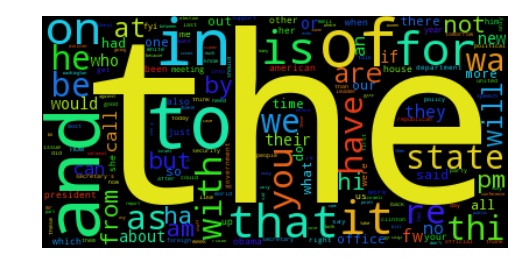

In [103]:
# Generate wordcloud without stop words
wordcloud = WordCloud(stopwords=[]).generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

As we can see, it's beautiful, but not quite satisfying. There are a lot of stop words, and irrelevant words that we want to avoid. To avoid this, we will try to perform a simple pre-processing pipeline.

### From Pre-processed Text

First, we tokenize our text with the `TweetTokenizer` from `nltk` package, a tokenizer designed and trained to tokenize tweets, but also functional for our goal : 

In [43]:
from nltk.tokenize import TweetTokenizer

tokens = TweetTokenizer().tokenize(text)
print('{} words.'.format(len(tokens)))
tokens[:10]

NameError: name 'text' is not defined

Now we remove the stopwords and small words using the wordcloud stopwords list : 

In [65]:
from wordcloud import STOPWORDS
stopwords = list(STOPWORDS)

# Remove some arbitrary irrelevant words
irrelevant = ['one', 'two', 'will', 'said', 'also']
for w in irrelevant:
    stopwords.append(w)

# Filter the tokens
tokens = [w for w in tokens if w not in stopwords and len(w) > 2]
print('{} words.'.format(len(tokens)))
tokens[:10]

NameError: name 'tokens' is not defined

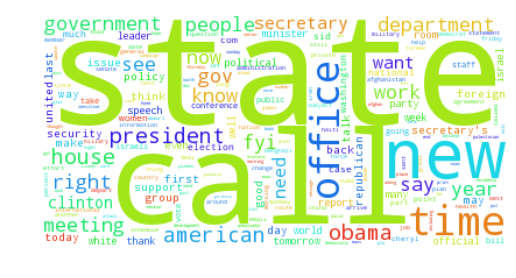

In [131]:
wordcloud = WordCloud(stopwords=[], background_color='white').generate(' '.join(tokens))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

This is way better. What if we apply some stemming processing ?

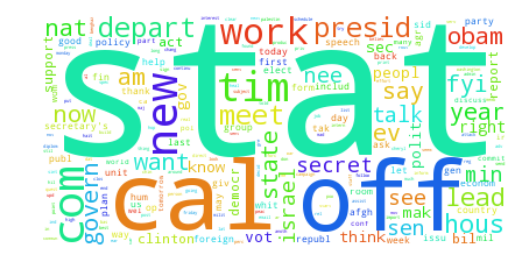

In [134]:
from nltk.stem.lancaster import LancasterStemmer

st = LancasterStemmer()
stem = list(map(lambda w : st.stem(w), tokens))

wordcloud = WordCloud(stopwords=[], background_color='white').generate(' '.join(stem))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

That's probably not very useful for our wordcloud goal, since it removes some part of the word with useful meaning in a wordcloud, like _office_ becoming _off_.

## Countries and Sentiments

The main goal of this section is to analyize the sentiment of each country in this corpus

First, we gather the possible names for each country, for example United States could be US or USA...We use [pycountry](https://pypi.python.org/pypi/pycountry/16.11.27.1).

In [17]:
countries = {}

for c in pycountry.countries:
    countries[c.name] = [c.name.lower(), c.alpha_2.lower(), c.alpha_3.lower()]
    
print('Number of countries : {}.'.format(len(countries)))
countries

Number of countries : 249.


{'Afghanistan': ['afghanistan', 'af', 'afg'],
 'Albania': ['albania', 'al', 'alb'],
 'Algeria': ['algeria', 'dz', 'dza'],
 'American Samoa': ['american samoa', 'as', 'asm'],
 'Andorra': ['andorra', 'ad', 'and'],
 'Angola': ['angola', 'ao', 'ago'],
 'Anguilla': ['anguilla', 'ai', 'aia'],
 'Antarctica': ['antarctica', 'aq', 'ata'],
 'Antigua and Barbuda': ['antigua and barbuda', 'ag', 'atg'],
 'Argentina': ['argentina', 'ar', 'arg'],
 'Armenia': ['armenia', 'am', 'arm'],
 'Aruba': ['aruba', 'aw', 'abw'],
 'Australia': ['australia', 'au', 'aus'],
 'Austria': ['austria', 'at', 'aut'],
 'Azerbaijan': ['azerbaijan', 'az', 'aze'],
 'Bahamas': ['bahamas', 'bs', 'bhs'],
 'Bahrain': ['bahrain', 'bh', 'bhr'],
 'Bangladesh': ['bangladesh', 'bd', 'bgd'],
 'Barbados': ['barbados', 'bb', 'brb'],
 'Belarus': ['belarus', 'by', 'blr'],
 'Belgium': ['belgium', 'be', 'bel'],
 'Belize': ['belize', 'bz', 'blz'],
 'Benin': ['benin', 'bj', 'ben'],
 'Bermuda': ['bermuda', 'bm', 'bmu'],
 'Bhutan': ['bhutan', 'b

So for each of the 249 countries, we get 3 ways to represent it. We manually add some well-known acronyms for some countries : 

In [87]:
countries['United States'] += ['u.s', 'u.s.', 'u.s.a', 'u.s.a.']
countries['United Kingdom'] += ['uk', 'u.k.', 'u.k']

We choose to analyze the body text and subject : 

In [12]:
# Extract subjects and body texts 
subject = emails['ExtractedSubject'].dropna()
body = emails['ExtractedBodyText'].dropna()

# Merge subjects and bodies for sentiment analysis
mails = [x[0] + ' ' + x[1] for x in zip(subject, body)]

For each mail, we perform a sentiment analysis on the text, and look for related countries. It turns out that some of the country acronyms have actually another meaning in English, we try to avoid those side effects by manually removing those from the mail text. Also sentiment analysis is case sensitive, so we decide to make the text lowercase only for the country detection : 

In [106]:
from nltk.sentiment import vader

# Useful objects to perform analysis
vad = vader.SentimentIntensityAnalyzer()
tok = TweetTokenizer()

id = 0
sentiments = {}
coutries_stopwords = ['re', 'us', 'no', 'nor', 'ca', 'pm', 'cc', 'fm', 'tv', 'lie', 'mr', 'jordan', 'mm', 'mn', 'ai']
coutries_stopwords = set(coutries_stopwords).union(STOPWORDS)

# Take 100 first mails for development
for mail in mails[:100]: 
    # Perform sentiment analysis
    score = vad.polarity_scores(mail)['compound']
    
    # Use the lowercase and tokenized, without stopwords version to find countries
    txt = set(tok.tokenize(mail.lower())) - coutries_stopwords
    
    # Look into the concerned countries
    for country, names in countries.items():
        if not txt.isdisjoint(set(names)):
            sentiments[id] = [country, score]
            id += 1
            
df = pd.DataFrame.from_dict(sentiments, orient='index')
df.columns = ['Country', 'Sentiment']
df.head(5)

,Country,Sentiment
0,Libya,0.5859
1,Libya,-0.5859
2,Egypt,-0.7430
3,Libya,-0.7430
4,Libya,0.0000


Now that we gathered all the sentiments for the countries, we aggregate by country by taking the mean of the sentiments ($sentiment \in [-1, 1]$ with -1 meaning very negative and 1 very positive) : 

In [108]:
df = df.groupby('Country').agg('mean')
df.head(5)

,Sentiment
Country,
Afghanistan,0.988100
Albania,0.079667
Angola,0.243200
Antarctica,-0.476700
Armenia,0.988100


Let's plot the results : 

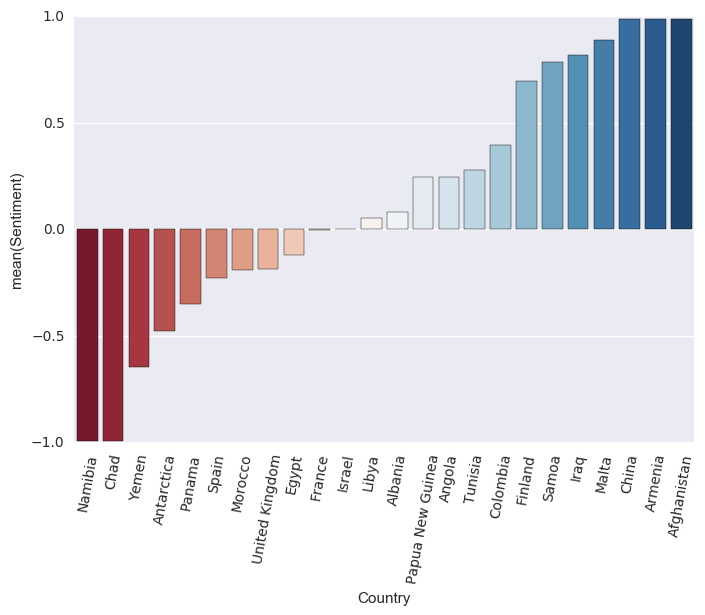

In [189]:
data = pd.Series(data=df['Sentiment']).sort_values()

plot = sns.barplot(data.index, data, palette=reversed(sns.color_palette("RdBu_r", len(data))))
plt.xticks(rotation=80)
sns

plt.show()